### **Reading Data:**

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import  Axes3D #<-- Note the capitalization! 
fname = "raw_dataset.txt"
sampleRate = 20

with open(fname) as f:
    content = f.readlines()

content = [x.strip() for x in content] 
acc_x, acc_y, acc_z, gyro_x, gyro_y,gyro_z,quat_x,quat_y,quat_z,quat_w = ([] for i in range(10))
for raw in content: 
    acc_x.append(json.loads(raw)["acc_x"])
    acc_y.append(json.loads(raw)["acc_y"])
    acc_z.append(json.loads(raw)["acc_z"])
    gyro_x.append(json.loads(raw)["gyro_x"])
    gyro_y.append(json.loads(raw)["gyro_y"])
    gyro_z.append(json.loads(raw)["gyro_z"])
    quat_x.append(json.loads(raw)["quat_x"])
    quat_y.append(json.loads(raw)["quat_y"])
    quat_z.append(json.loads(raw)["quat_z"])
    quat_w.append(json.loads(raw)["quat_w"])
data = {
        "acc":{"x":acc_x,"y":acc_y,"z":acc_z},
        "gyro":{"x":gyro_x,"y":gyro_y,"z":gyro_z},
        "quat":{"x":quat_x,"y":quat_y,"z":quat_z,"w":quat_w}
       }

In [2]:
def running_mean(l, N):
    sum = 0
    result = list( 0 for x in l)
 
    for i in range( 0, N ):
        sum = sum + l[i]
        result[i] = sum / (i+1)
 
    for i in range( N, len(l) ):
        sum = sum - l[i-N] + l[i]
        result[i] = sum / N
 
    return result

def plotData(data,seconds=0,single=False):
    
    if(single == True):
        if(seconds != 0):
            plt.plot(time[:sampleRate*seconds],data[:seconds*sampleRate])
        else:
            plt.plot(time,data)
    else:
        for attributes,values in data.items():
            for att,val in data[attributes].items():
                if(seconds > 0):
                    plt.plot(time[:sampleRate*seconds],val[:seconds*sampleRate],label=att)
                else:
                    plt.plot(time,val,label=att)
                    
            plt.xlabel("Time[Seconds]")
            plt.ylabel(attributes)
            plt.legend()
            plt.show()
    

 ### **Plotting RAW Data:** 

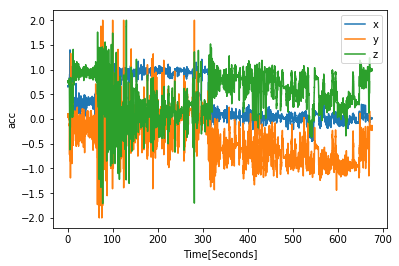

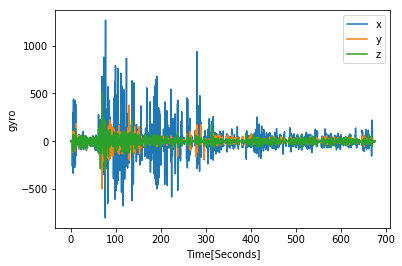

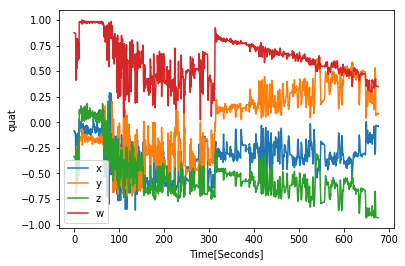

In [3]:

fig = plt.figure()
sampleCount = len(content)
time = np.arange(0,sampleCount/sampleRate,(1/sampleRate))

plotData(data)

### **Filtering:**

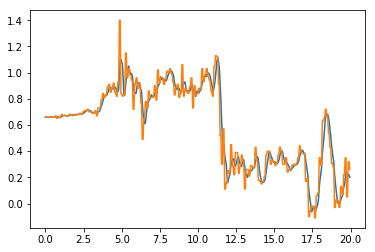

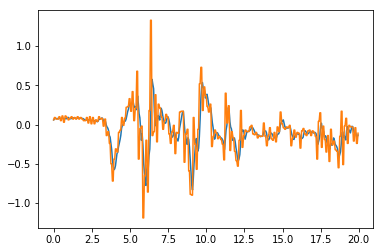

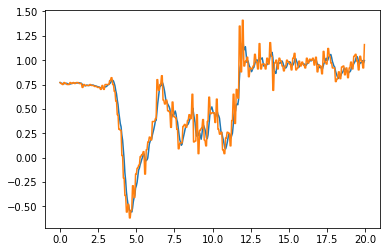

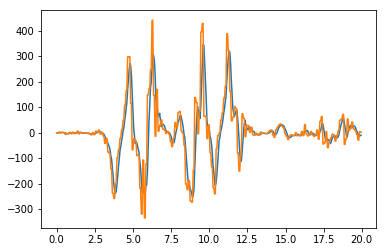

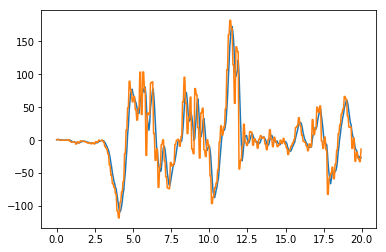

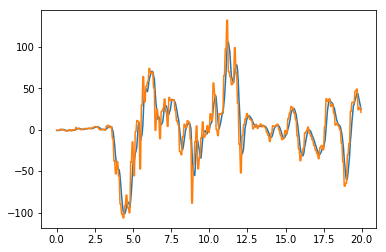

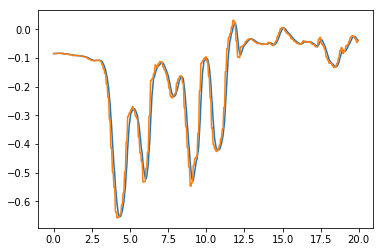

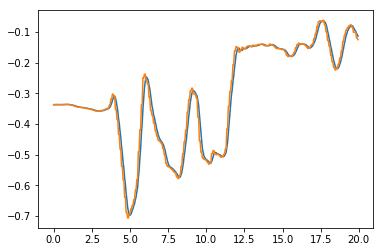

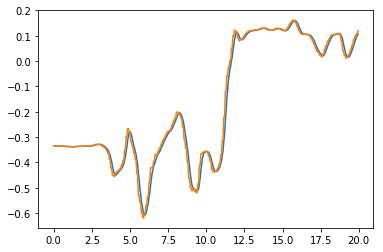

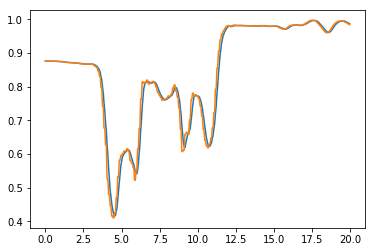

In [11]:
import copy
MA_data = copy.deepcopy(data)

for attributes,values in data.items():
    for _attributes,_values in data[attributes].items():
        MA_data[attributes][_attributes] = running_mean(_values,int(sampleRate/4))    

for attributes,values in data.items():
    for _attributes,_values in data[attributes].items():
        plotData(MA_data[attributes][_attributes],20,True)
        plotData(data[attributes][_attributes],20,True)
        plt.show()

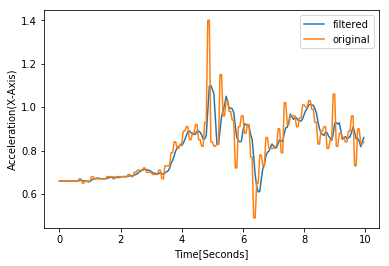

In [25]:
plt.plot(time[:10*sampleRate],MA_data["acc"]["x"][:sampleRate*10],label="filtered")
plt.plot(time[:10*sampleRate],data["acc"]["x"][:sampleRate*10],label="original")

plt.xlabel("Time[Seconds]")
plt.ylabel("Acceleration(X-Axis)")
plt.legend()
plt.show()